In [97]:
import numpy as np
import sympy as sp
from sympy import Matrix
import matplotlib.pyplot as plt

In [141]:
v = sp.Matrix([0,2,4,6,8,10])
f = sp.Matrix([0, 2.90, 14.8, 39.6, 74.3, 119])
# use a polynomial function of degree 5
vp = np.array(v)
am5 = sp.ones(6,1)
for i in range(1,6):
    am5 = am5.col_insert(i,Matrix(vp**i))
am5 = am5.col_insert(6,f)
am5

Matrix([
[1,  0,   0,    0,     0,      0,    0],
[1,  2,   4,    8,    16,     32,  2.9],
[1,  4,  16,   64,   256,   1024, 14.8],
[1,  6,  36,  216,  1296,   7776, 39.6],
[1,  8,  64,  512,  4096,  32768, 74.3],
[1, 10, 100, 1000, 10000, 100000,  119]])

In [138]:
air_rref = am5.rref()[0]
params5 = np.array(air_rref.col(6))
params5

array([[0],
       [1.71250000000001],
       [-1.19479166666667],
       [0.661458333333335],
       [-0.0700520833333336],
       [0.00260416666666668]], dtype=object)

In [103]:
def air_force(v,params):
    length = len(params)
    res = 0
    for i in range(length):
        res += float(params[i]) * v**i
    return res

In [121]:
air_force(7.5,params5)

64.83837890625

In [122]:
#use polynomial function of degree 3 won't get a solution
am3 = sp.ones(6,1)
for i in range(1,4):
    am3 = am3.col_insert(i,Matrix(vp**i))
am3 = am3.col_insert(4,f)
air_rref = am3.rref()[0]
air_rref

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]])

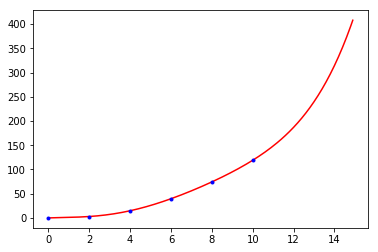

In [123]:
# the polynomial function of degree 5
x = np.arange(0,15,0.1)
y = air_force(x,params5)
plt.plot(x,y,'r')

# orginal data
vp = np.array(v)
fp = np.array(f)
plt.plot(vp,fp,'.b')

plt.show()


In [159]:
#general case
def rref_fit(x,y,degree):
    """
    use rref(reduced row echelon form) to compute the params of polynomial function
    to fit given data (x,y)

    Inputs:
    - x: independent variables, shape ==(D,1)
    - y: dependent variables, shape ==(D,1)
    - degree: the degree of polynomial function used to fit data

    Returns:
    - params: the params of polynomial function, shape == (degree+1,1)
    """
    xi = np.array(x)
    yi = np.array(y)
    D = xi.shape[0] 
    argumented_matrix = sp.ones(D,1)
    for i in range(1,degree+1):
        argumented_matrix = argumented_matrix.col_insert(i,Matrix(xi**i))
    argumented_matrix = argumented_matrix.col_insert(degree+1,Matrix(yi))
    
    rref_matrix,pivots = argumented_matrix.rref()
    return np.array(rref_matrix.col(-1)).reshape(-1,)

In [161]:
rref_fit(v,f,5)

array([0, 1.71250000000001, -1.19479166666667, 0.661458333333335,
       -0.0700520833333336, 0.00260416666666668], dtype=object)

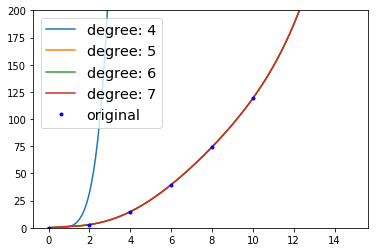

In [182]:
x = np.arange(0,15,0.1)
degrees = [4,5,6,7]

v = sp.Matrix([0,2,4,6,8,10])
f = sp.Matrix([0, 2.90, 14.8, 39.6, 74.3, 119])

fig, ax = plt.subplots()
for degree in degrees:
    params = rref_fit(v,f,degree)
    y = air_force(x,params)
    ax.plot(x, y, label="degree: {}".format(degree))

vp = np.array(v)
fp = np.array(f)
ax.plot(vp,fp,'.b',label="original")

legend = ax.legend(loc='upper left', fontsize='x-large')
# Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('#00FFCC')
plt.ylim(0,200)
plt.show()